<a href="https://colab.research.google.com/github/hansolothe3rd/MACHINE-LEARNING/blob/main/Sloan_Digital_Sky_Survey_DR16_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sloan Digital Sky Survey DR16 Exploration
- Daniel Barella
- 12/17/22

## Assignment:

- For this part of the project, you will continue your data exploration by:
 - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
 - Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.
- Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).


Source of data
- https://www.kaggle.com/datasets/muhakabartay/sloan-digital-sky-survey-dr16

License: 
- Creative Commons Attribution license ([CC-BY](https://creativecommons.org/licenses/by-sa/4.0/))

## Content
The table results from a query which joins two tables:

- "PhotoObj" which contains photometric data
- "SpecObj" which contains spectral data.
16 variables (double) and 1 additional variable (char) 'class'.
A class object can be predicted from the other 16 variables.

Variables description:
- objid = Object Identifier
- ra = J2000 Right Ascension (r-band)
- dec = J2000 Declination (r-band)
- u = better of deV/Exp magnitude fit (u-band)
- g = better of deV/Exp magnitude fit (g-band)
- r = better of deV/Exp magnitude fit (r-band)
- i = better of deV/Exp magnitude fit (i-band)
- z = better of deV/Exp magnitude fit (z-band)
- run = Run Number
- rerun = Rerun Number
- camcol = Camera column
- field = Field number
- specobjid = Object Identifier
- class = object class (galaxy, star or quasar object)
- redshift = Final Redshift
- plate = plate number
- mjd = MJD of observation
- fiberid = fiberID

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [121]:
df = pd.read_csv('/content/Skyserver_12_30_2019 4_49_58 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [122]:
df_ml = df.copy()
df_ml = df_ml.drop(['objid', 'specobjid', 'fiberid', 'rerun'], axis=1)
df_ml.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,5,771,STAR,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,6,220,STAR,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,1,13,STAR,0.000165,2861,54583
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,3,121,GALAXY,0.058155,2002,53471
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,3,191,GALAXY,0.072210,2123,53793


- Dropping the id columns here will allow for better ML.

## Prepare/clean the data for exploratory analysis purposes

How many rows and columns?


In [123]:
df_ml.shape

(100000, 14)

What are the datatypes of each variable?

In [124]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ra        100000 non-null  float64
 1   dec       100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   run       100000 non-null  int64  
 8   camcol    100000 non-null  int64  
 9   field     100000 non-null  int64  
 10  class     100000 non-null  object 
 11  redshift  100000 non-null  float64
 12  plate     100000 non-null  int64  
 13  mjd       100000 non-null  int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 10.7+ MB


Are there duplicates? If so, drop any duplicates.

In [125]:
df_ml.duplicated().sum()

0

Identify missing values.

In [126]:
df_ml.isna().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

In [127]:
df_ml.nunique

<bound method DataFrame.nunique of                ra        dec         u         g         r         i  \
0       47.372545   0.820621  18.69254  17.13867  16.55555  16.34662   
1      116.303083  42.455980  18.47633  17.30546  17.24116  17.32780   
2      172.756623  -8.785698  16.47714  15.31072  15.55971  15.72207   
3      201.224207  28.771290  18.63561  16.88346  16.09825  15.70987   
4      212.817222  26.625225  18.88325  17.87948  17.47037  17.17441   
...           ...        ...       ...       ...       ...       ...   
99995  228.674917  19.179460  19.32631  18.82748  18.65659  18.60481   
99996  173.757382  36.441603  18.33687  17.30365  17.16037  17.14895   
99997  205.426531  38.499053  17.50690  15.63152  15.22328  15.04469   
99998  337.135144  -9.635967  19.33946  17.21436  16.29697  15.86745   
99999   37.440188  25.400888  18.11769  16.86279  16.31057  16.07582   

              z   run  camcol  field   class  redshift  plate    mjd  
0      16.17639  4849       5

In [128]:
df_ml.value_counts()

ra          dec         u         g         r         i         z         run   camcol  field  class   redshift   plate  mjd  
0.013061    -2.430081   18.55528  17.32828  17.20341  17.18222  17.18046  6361  4       12     STAR    -0.000698  7850   56956    1
210.524601   11.143029  18.02393  16.82644  16.23775  15.86136  15.66288  3836  3       408    GALAXY   0.071837  1703   53799    1
210.589396   53.400181  18.44684  17.21241  16.71799  16.52839  16.47038  3180  6       50     STAR    -0.000507  1324   53088    1
210.588759   59.418987  17.76804  16.70717  16.40376  16.19597  16.05955  2304  2       282    GALAXY   0.032084  787    52320    1
210.588625   39.370110  18.40118  16.99566  16.35453  15.98127  15.72925  3893  3       305    GALAXY   0.063748  1378   53061    1
                                                                                                                                 ..
151.420955   55.148825  19.08355  18.16671  17.86367  17.74656  17.70234  2987  3

In [129]:
df_ml['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

In [130]:
df_ml.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.512888,25.052056,18.637915,17.407128,16.881676,16.625534,16.467087,3978.727640,3.274010,187.243080,0.170621,2587.984270,53913.908690
std,78.039070,20.567259,0.832284,0.985921,1.133337,1.209532,1.281788,1691.498597,1.621208,141.037298,0.437571,2210.547391,1547.244489
min,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,1.000000,11.000000,-0.004136,266.000000,51608.000000
25%,136.356526,6.770380,18.212902,16.852982,16.196607,15.865275,15.619960,2826.000000,2.000000,85.000000,0.000001,1186.000000,52733.000000
50%,180.411688,23.918611,18.873250,17.515860,16.890640,16.599885,16.428385,3900.000000,3.000000,153.000000,0.045997,2091.000000,53726.000000
75%,224.369107,40.344539,19.273302,18.056060,17.585750,17.344912,17.234625,5061.000000,5.000000,249.000000,0.095429,2910.000000,54585.000000
max,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,8162.000000,6.000000,982.000000,7.011245,11703.000000,58543.000000


## Explore the data

Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.


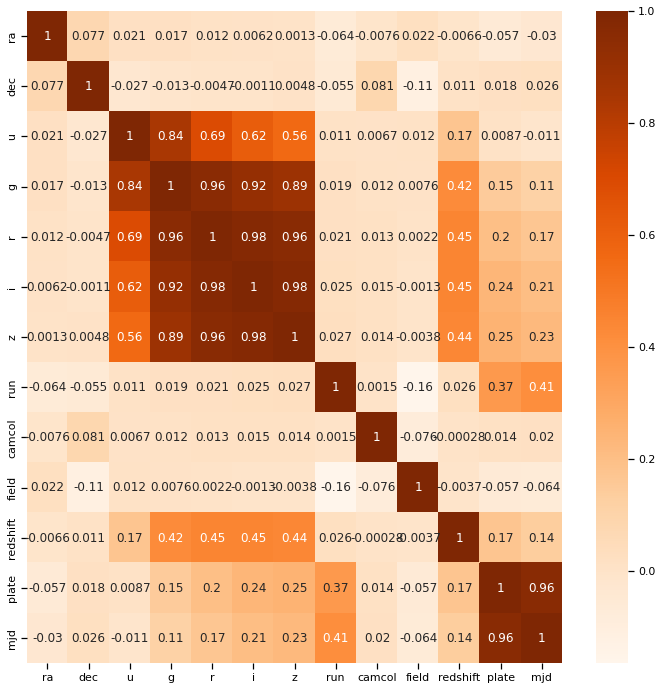

In [131]:
corr = df_ml.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap = 'Oranges',annot = True);

- It seems that the target 'class' is closely correlated with the 'redshift'. Also there appears to be a strong correlation between, 'u', 'g', 'r', 'i', 'z'.

Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.


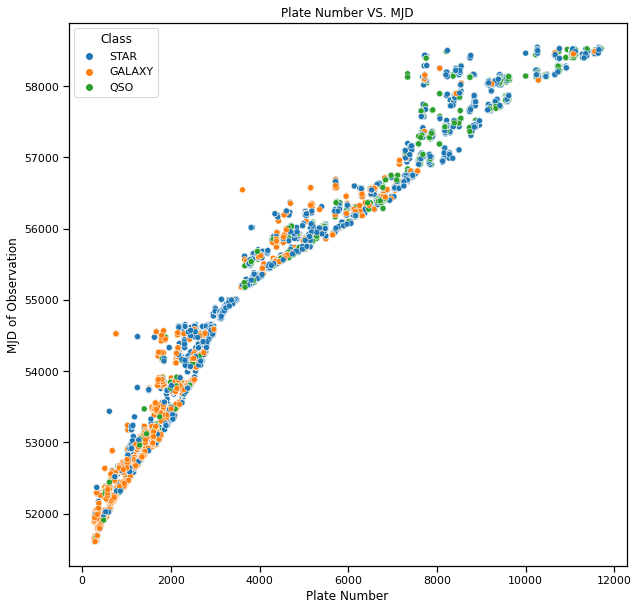

In [139]:
X = df_ml['plate']  
y = df_ml['mjd']

sns.set_context('notebook')
plt.figure(figsize=(10,10))

sns.scatterplot(data = df_ml, x = X, y = y, hue = 'class');

plt.xlabel('Plate Number')
plt.ylabel('MJD of Observation')
plt.title('Plate Number VS. MJD')
plt.legend(title='Class')

plt.show()

The 'plate number' corresponds with the location within the image, and the 'mjd' corresponds with when the observation was made. The colors correspond with the 'class'. The earliest observations seem to be mostly Galaxys.


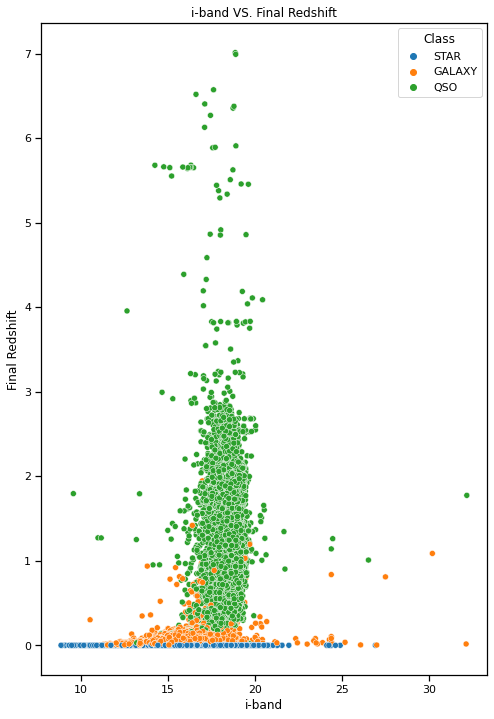

In [158]:
X = df_ml['i']
y = df_ml['redshift']

sns.set_context('notebook')
plt.figure(figsize=(8,12))

sns.scatterplot(data=df_ml, x = X, y = y, hue= 'class');

plt.xlabel('i-band')
plt.ylabel('Final Redshift')
plt.title('i-band VS. Final Redshift')
plt.legend(title='Class')

plt.show()

'i-band', represents wavelengths of light that are towards the infared, and 'Final Redshift', represents the red shift that happens with celestial objects the farther away they are moving. In this graph you can see a pretty clear distinction between the different classes. The higher the 'Final Redshift', the more likely the observed object is a 'QSO', or a quasar. 